Импортируем все необходимые библиотеки

In [2]:
#загружаем библиотеки для работы со структурированными данными и массивами
import pandas as pd
import numpy as np

#загружаем библиотеку для корректной загрузки датасетов
import os
#загружаем библиотеку для проверки корректности url ссылки
import requests

#загружаем классы для визуализации
from matplotlib import pyplot as plt
import seaborn as sns

#загружаем библиотеку для корреляционного анализа
import phik

# загружаем классы для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

# загружаем функции для работы с метриками
from sklearn.metrics import mean_squared_error 

#загружаем класс для проведения одновыборочного t-test
from scipy import stats as st

Объявляем также константы

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

#кол-во скважин, исследуемых при разведке региона
N_INVEST = 500

#кол-во лучших скважин, выбираемых с помощью машинного обучения
N_BEST = 200

#общий бюджет на разработку
BUDGET = 10000000000

#доход с каждой единицы продукта (с 1 тыс. баррелей)
REVENUE_PER_UNIT = 450000

## Загрузка и изучение данных

Загружаем файлы датасетов, создаем датафреймы, выводим первые 15 строк и основную информацию о них для ознакомления. Не задаем сразу параметр `index_col`, так как нет уверенности в том, что в данных нет дубликатов

In [4]:
#проверяем существование указанной дирректории и в случае возврата True загружаем датасеты в переменные, указав верные разделители
pth1 = '/datasets/geo_data_0.csv'
pth2 = 'https://.../datasets/geo_data_0.csv' #часть ссылки скрыта ввиду NDA
pth3 = 'geo_data_0.csv'
if os.path.exists(pth1):
    data_geo_1 = pd.read_csv(pth1, sep=',', decimal = '.')
    data_geo_2 = pd.read_csv('/datasets/geo_data_1.csv', sep=',', decimal = '.')
    data_geo_3 = pd.read_csv('/datasets/geo_data_2.csv', sep=',', decimal = '.')
#добавляем проверку корректности url ссылки при помощи requests.get(url) и проверки status_code == 200
elif requests.get(pth2).status_code == 200:
    data_geo_1 = pd.read_csv(pth2, sep=',', decimal = '.')
    data_geo_2 = pd.read_csv('https://.../datasets/geo_data_1.csv', sep=',', decimal = '.') #часть ссылки скрыта ввиду NDA
    data_geo_3 = pd.read_csv('https://.../datasets/geo_data_2.csv', sep=',', decimal = '.') #часть ссылки скрыта ввиду NDA
elif os.path.exists(pth3):
    data_geo_1 = pd.read_csv(pth3, sep=',', decimal = '.')
    data_geo_2 = pd.read_csv('geo_data_1.csv', sep=',', decimal = '.')
    data_geo_3 = pd.read_csv('geo_data_2.csv', sep=',', decimal = '.')
else:
    print('Something is wrong')


#выводим первые 15 строк и основную информацию для каждого датафрейма    
for d in [data_geo_1,data_geo_2,data_geo_3]:
    display(d.head(15))
    d.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Созданные датафреймы:**
- имеют следующие размерности:
    - data_geo_1 - 10000 строк;
    - data_geo_2 - 10000 строк;
    - data_geo_3 - 10000 строк;
- не имеют явных пропусков
- столбцы имеют корректные типы данных
- названия столбцов частично приведены к змеиному "регистру"
- при первичном ознакомлении неявные дубликаты не выделяются

Для корректного обучения модели необходимо произвести предобработку данных

##  Предобработка данных

### Переименование столбцов

Для приведения наименований столбцов к стандарту `PEP8` добавим нижнее подчеркивание между буквенным обозначением и числовым

In [5]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    d.columns = d.columns.str.replace('f0','f_0').str.replace('f1','f_1').str.replace('f2','f_2')
    print(d.columns)

Index(['id', 'f_0', 'f_1', 'f_2', 'product'], dtype='object')
Index(['id', 'f_0', 'f_1', 'f_2', 'product'], dtype='object')
Index(['id', 'f_0', 'f_1', 'f_2', 'product'], dtype='object')


Проверим наличие пропусков в наименованиях столбцов

In [6]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(d.columns.tolist())

['id', 'f_0', 'f_1', 'f_2', 'product']
['id', 'f_0', 'f_1', 'f_2', 'product']
['id', 'f_0', 'f_1', 'f_2', 'product']


Лишних пробелов нет

**Между буквенной и числовой частью в наименованиях столбцов добавлено нижнее подчеркивание. Столбцы приведены к змеиному регистру, лишних пробелов не обнаружено.**

### Проверка пропусков

Посчитаем все пропуски во всех датафреймах, подтвердив результаты первичного ознакомления

In [7]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(d.isna().sum().sort_values(ascending = False))

id         0
f_0        0
f_1        0
f_2        0
product    0
dtype: int64
id         0
f_0        0
f_1        0
f_2        0
product    0
dtype: int64
id         0
f_0        0
f_1        0
f_2        0
product    0
dtype: int64


**Во всех датафреймах отсутствуют явные пропуски**

### Аномальные значения

Выведем описательные статистики для всех количественных столбцов.

In [8]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    display(round(d.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
f_0,100000.0,0.50,0.87,-1.41,-0.07,0.50,1.07,2.36
f_1,100000.0,0.25,0.50,-0.85,-0.20,0.25,0.70,1.34
f_2,100000.0,2.50,3.25,-12.09,0.29,2.52,4.72,16.00
product,100000.0,92.50,44.29,0.00,56.50,91.85,128.56,185.36


,count,mean,std,min,25%,50%,75%,max
f_0,100000.0,1.14,8.97,-31.61,-6.30,1.15,8.62,29.42
f_1,100000.0,-4.80,5.12,-26.36,-8.27,-4.81,-1.33,18.73
f_2,100000.0,2.49,1.70,-0.02,1.00,2.01,4.00,5.02
product,100000.0,68.83,45.94,0.00,26.95,57.09,107.81,137.95


,count,mean,std,min,25%,50%,75%,max
f_0,100000.0,0.0,1.73,-8.76,-1.16,0.01,1.16,7.24
f_1,100000.0,-0.0,1.73,-7.08,-1.17,-0.01,1.16,7.84
f_2,100000.0,2.5,3.47,-11.97,0.13,2.48,4.86,16.74
product,100000.0,95.0,44.75,0.00,59.45,94.93,130.60,190.03


У признаков `f_0`, `f_1`, `f_2` сложно оценить, есть ли аномальные значения, так как мы не владеем сведениями, что означают эти признаки, поэтому удалять или изменять значения этих столбцов не будем. В столбцах с объемом запасов в скважинах аномальных экстремальных значений не наблюдается. Из особенностей - у всех трех регионов видно, что присутствуют скважины без запасов сырья.

Посмотрим сколько всего строк в каждом датасете со значением  меньше 0.1 в столбце `product`

In [9]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f"Кол-во скважин с запасами сырья меньше 0.1 : {d[d['product'] < 0.1].shape[0]}")

Кол-во скважин с запасами сырья меньше 0.1 : 26
Кол-во скважин с запасами сырья меньше 0.1 : 8235
Кол-во скважин с запасами сырья меньше 0.1 : 28


Таких случаев много, когда есть скважины, в которых объем сырья меньше `0.1` и даже `0`, поэтому удалить такие данные или преобразовывать их не будем, это не аномальные значения, а значения, благодаря которым модель будет обучаться на более широком диапазоне значений

**В рассматриваемых датасетах отсутствуют аномальные значения**

### Изменение типов данных столбцов

Проверим типы данных всех столбцов всех датафреймов:

In [10]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f_0      100000 non-null  float64
 2   f_1      100000 non-null  float64
 3   f_2      100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f_0      100000 non-null  float64
 2   f_1      100000 non-null  float64
 3   f_2      100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

**Типы данных столбцов соответствуют значениям в них**

### Обработка дубликатов

Проверим датафреймы на наличие явных дубликатов

In [11]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f"Кол-во явных дубликатов : {d.duplicated().sum()}")

Кол-во явных дубликатов : 0
Кол-во явных дубликатов : 0
Кол-во явных дубликатов : 0


Теперь проверим датафреймы на наличие неявных дубликатов. Для начала проверим, что `id` в каждом датафрейме уникальны

In [12]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f"Кол-во неявных дубликатов  в столбце id : {d['id'].duplicated().sum()}")

Кол-во неявных дубликатов  в столбце id : 10
Кол-во неявных дубликатов  в столбце id : 4
Кол-во неявных дубликатов  в столбце id : 4


Посмотрим на эти строки

In [13]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f'Неявные дубликаты в столбце id')
    index = d['id'].value_counts().loc[lambda x : x > 1].index.to_list()
    display(d[d['id'].isin(index)].sort_values(by='id'))

Неявные дубликаты в столбце id


,id,f_0,f_1,f_2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Неявные дубликаты в столбце id


,id,f_0,f_1,f_2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


Неявные дубликаты в столбце id


,id,f_0,f_1,f_2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Сложно сказать, какие строки из дубликатов лучше оставить, так как нам неизвестны какие характеристики указаны в столбцах `f_0`, `f_1`, `f_2`, поэтому используем стратегию `keep=first`.

In [14]:
#смотрим кол-во строк до удаления
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f"Кол-во строк до удаления: {d.shape[0]}")

data_geo_1 = data_geo_1.drop_duplicates(subset=['id'], keep = 'first').reset_index(drop = True)
data_geo_2 = data_geo_2.drop_duplicates(subset=['id'], keep = 'first').reset_index(drop = True)
data_geo_3 = data_geo_3.drop_duplicates(subset=['id'], keep = 'first').reset_index(drop = True)

#смотрим кол-во строк после удаления
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(f"Кол-во строк после удаления: {d.shape[0]}")

Кол-во строк до удаления: 100000
Кол-во строк до удаления: 100000
Кол-во строк до удаления: 100000
Кол-во строк после удаления: 99990
Кол-во строк после удаления: 99996
Кол-во строк после удаления: 99996


Дополнительно проверим, появятся ли неявные дубликаты, когда мы разделим датасеты на входные и целевой признаки: после удаления столбца `id`, но до удаления целевого признака `product` 

In [15]:
for d in [data_geo_1,data_geo_2,data_geo_3]:
    print(d[['f_0','f_1','f_2','product']].duplicated().sum())

0
0
0


Дополнительных неявных дубликатов при разделении датасетов на выборки обнаружено не будет.

**При проверке датасетов явных дубликатов обнаружено не было, но были обнаружены неявные дубликаты в столбце с `id`, значения в котором должны быть уникальными. Неявные дубликаты удалены. Также дополнительно проверили, что неявные дубликаты не появятся, когда мы разделим датасеты на входные и целевой признаки: после удаления столбца `id`, но до удаления целевого признака `product` перед обучением модели.**

**На этапе предобработки данных были выполнены следующие действия и получены следующие результаты:**
- между буквенной и числовой частью в наименованиях столбцов добавлено нижнее подчеркивание. Столбцы приведены к змеиному регистру, лишних пробелов не обнаружено.
- датафреймы проверены на наличие явных пропусков
- в рассматриваемых датасетах отсутствуют аномальные значения
- типы данных столбцов соответствуют значениям в них
- при проверке датасетов явных дубликатов обнаружено не было, но были обнаружены неявные дубликаты в столбце с `id`, значения в котором должны быть уникальными. Неявные дубликаты удалены. Также дополнительно проверили, что неявные дубликаты не появятся, когда мы разделим датасеты на входные и целевой признаки: после удаления столбца `id`, но до удаления целевого признака `product` перед обучением модели.

## Исследовательский анализ

Хоть признаков очень мало и мы не знаем их природу, для наглядности посмотрим статистики и построим графики. Выведем описательные статистики для наших датафреймов 

In [16]:
#создадим словарь с нашими датафреймами, чтобы можно было выводить удобно их названия
dataframes = {
    'data_geo_1': data_geo_1,
    'data_geo_2': data_geo_2,
    'data_geo_3': data_geo_3,
}
for name, d in dataframes.items():
    print(f'Описательные статистики для {name}')
    display(round(d.describe(),2).T)

Описательные статистики для data_geo_1


,count,mean,std,min,25%,50%,75%,max
f_0,99990.0,0.50,0.87,-1.41,-0.07,0.50,1.07,2.36
f_1,99990.0,0.25,0.50,-0.85,-0.20,0.25,0.70,1.34
f_2,99990.0,2.50,3.25,-12.09,0.29,2.52,4.72,16.00
product,99990.0,92.50,44.29,0.00,56.50,91.85,128.56,185.36


Описательные статистики для data_geo_2


,count,mean,std,min,25%,50%,75%,max
f_0,99996.0,1.14,8.97,-31.61,-6.30,1.15,8.62,29.42
f_1,99996.0,-4.80,5.12,-26.36,-8.27,-4.81,-1.33,18.73
f_2,99996.0,2.49,1.70,-0.02,1.00,2.01,4.00,5.02
product,99996.0,68.82,45.94,0.00,26.95,57.09,107.81,137.95


Описательные статистики для data_geo_3


,count,mean,std,min,25%,50%,75%,max
f_0,99996.0,0.0,1.73,-8.76,-1.16,0.01,1.16,7.24
f_1,99996.0,-0.0,1.73,-7.08,-1.17,-0.01,1.16,7.84
f_2,99996.0,2.5,3.47,-11.97,0.13,2.48,4.86,16.74
product,99996.0,95.0,44.75,0.00,59.45,94.93,130.59,190.03


- средние значения объема сырья и других входных признаков схожи между собой у `data_geo_1` и `data_geo_3`.
- в датафрейме `data_geo_2` самые низкие показатели сырья.

Построим поочередно графики для всех признаков. Хоть в наших датафреймах все признаки непрерывные, но могут быть и новые данные, поэтому стандартизированно построим графики распределения количественных признаков для всех датафреймов с возможностью построения в дальнейшем разных типов графиков для непрерывных и дискретных  величин.

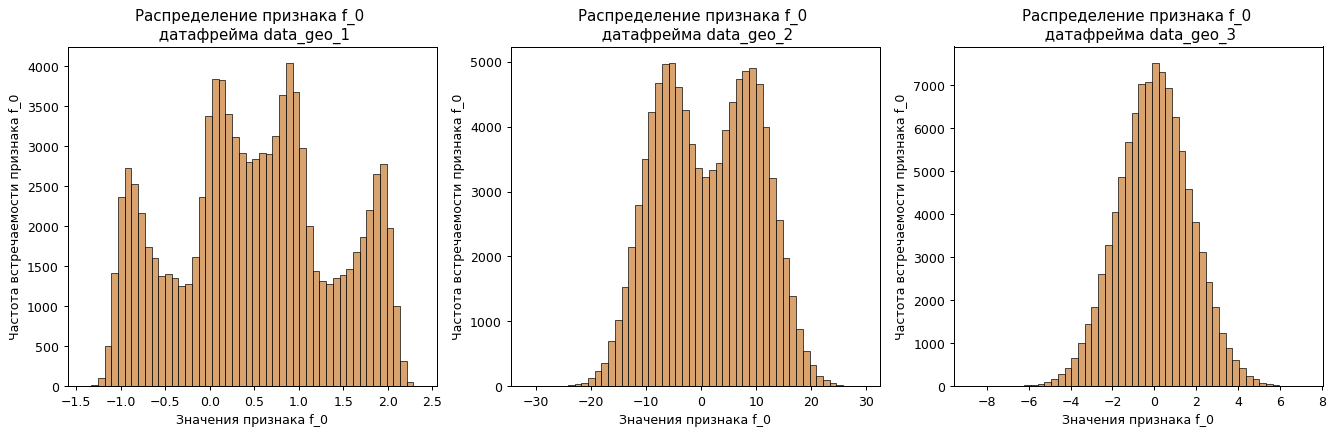

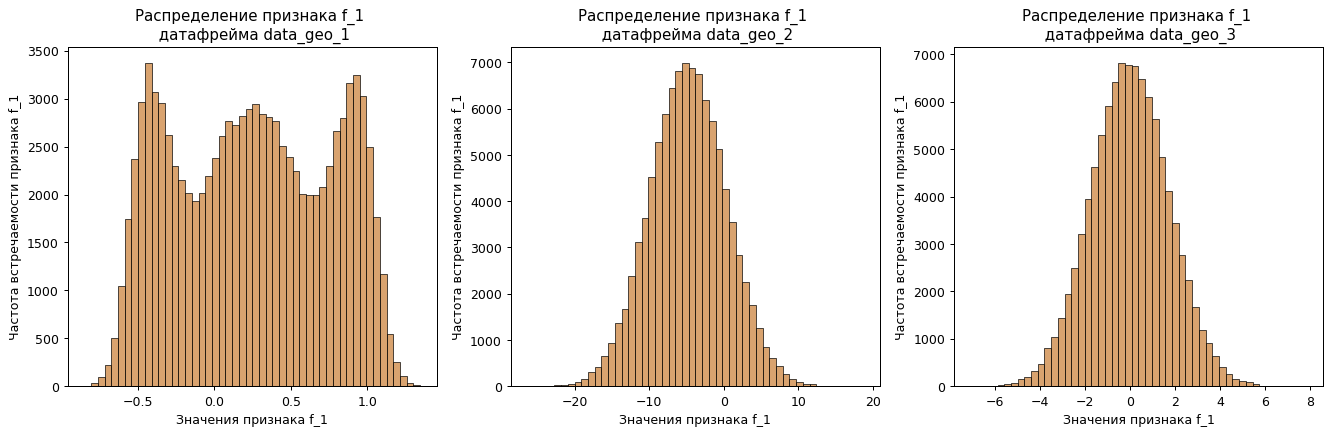

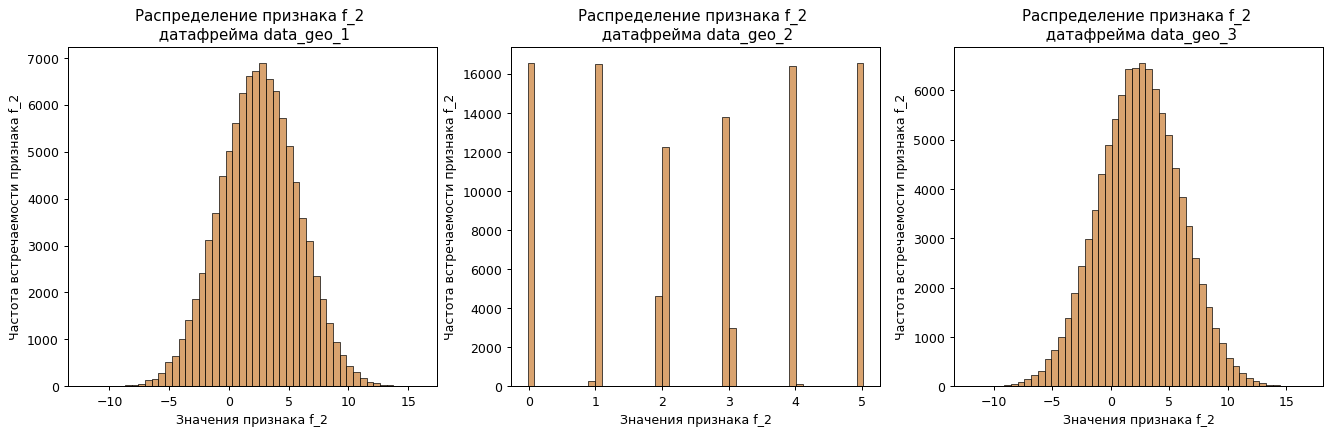

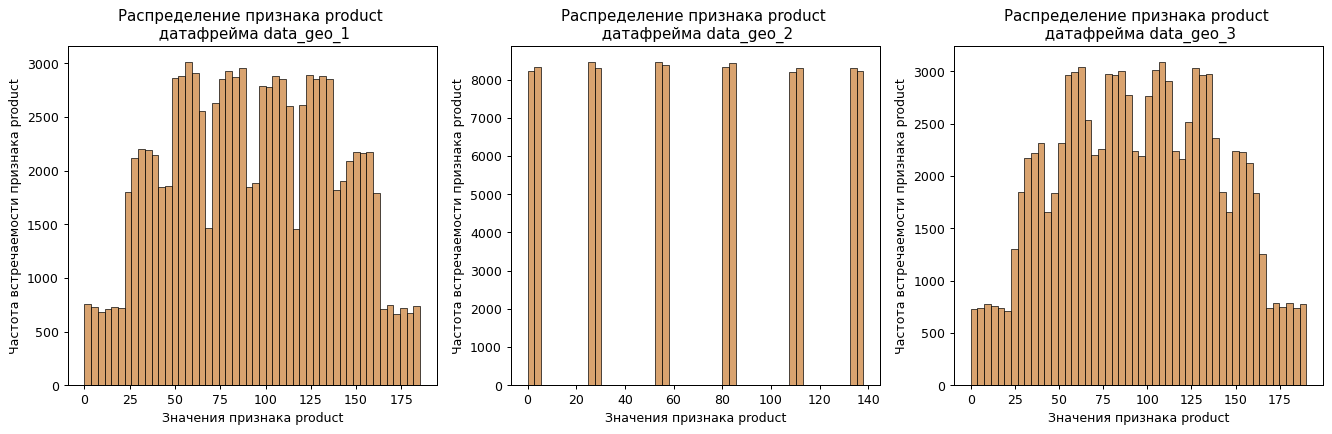

In [17]:
#для исключения столбца id добавляем конструкицю select_dtypes(exclude='object')
for c in data_geo_1.select_dtypes(exclude='object').columns.tolist():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5), dpi = 90)
    axes[0].set_title(f'Распределение признака {c} \n датафрейма data_geo_1')
    axes[0].set_xlabel(f'Значения признака {c}')
    axes[0].set_ylabel(f'Частота встречаемости признака {c}')
        
    axes[1].set_title(f'Распределение признака {c} \n датафрейма data_geo_2')
    axes[1].set_xlabel(f'Значения признака {c}')
    axes[1].set_ylabel(f'Частота встречаемости признака {c}')
                                 
    axes[2].set_title(f'Распределение признака {c} \n датафрейма data_geo_3')
    axes[2].set_xlabel(f'Значения признака {c}')
    axes[2].set_ylabel(f'Частота встречаемости признака {c}')
    if (data_geo_1[c].dtype == 'int64') and (len(data_geo_1[c].unique()) < 30):
        sns.countplot(data = data_geo_1, x=c, palette = 'deep',ax=axes[0])                          
        sns.countplot(data = data_geo_2, x=c, palette = 'deep',ax=axes[1])                        
        sns.countplot(data = data_geo_3, x=c, palette = 'deep',ax=axes[2])
        plt.show()
    else:
        sns.histplot(data = data_geo_1, x = c, color = 'peru', bins = 50,ax=axes[0])
        sns.histplot(data = data_geo_2, x = c, color = 'peru', bins = 50,ax=axes[1])
        sns.histplot(data = data_geo_3, x = c, color = 'peru', bins = 50,ax=axes[2])
        plt.show()

Полученные графики показывают следующие результаты:
 - только часть графиков показывает выраженное нормальное распределение
 - в `data_geo_2` графики `f_2` и `product` очень схожи, между ними возможно сильная неллинейная связь, проверим в дальнейшем. Их распределения больше похожи на распределения дискретных величин, хоть таковыми они и не являются
 - у локации 3 все входные признаки распределены нормально
 - графики распределений `product` у первой и третьей локации схожи

**На этапе исследовательского анализа были получены следующие результаты:**
- средние значения объема сырья и других входных признаков схожи между собой у `data_geo_1` и `data_geo_3`.
- в датафрейме `data_geo_2` самые низкие показатели сырья
- только часть графиков показывает выраженное нормальное распределение
- в `data_geo_2` графики `f_2` и `product` очень схожи, между ними возможно сильная неллинейная связь, проверим в дальнейшем. Их распределения больше похожи на распределения дискретных величин, хоть таковыми они и не являются
- у `data_geo_3` все входные признаки распределены нормально
- графики распределений `product` у первой и третьей локации схожи

## Корреляционный анализ

Построим матрицу корреляции для возможного выявления мультиколлинеарности между входными признаками. Так как присутствуют в данных нелинейные зависимости, то воспользуемся матрицей корреляции `phik`. Так как все признаки у нас непрерывные, то передадим наименования всех столбцов в переменную `interval_cols`.

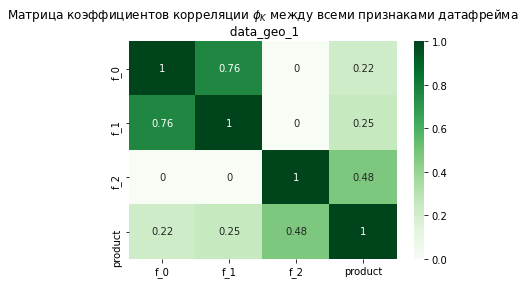

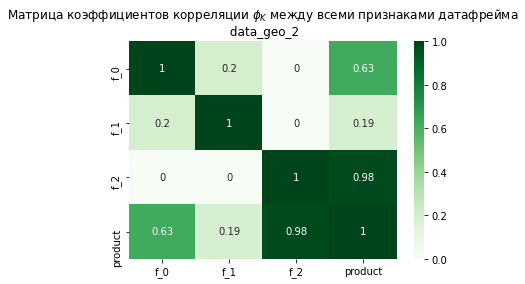

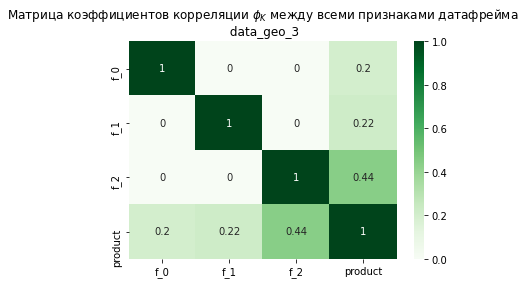

In [18]:
interval_cols = [
    'f_0',
    'f_1',
    'f_2',
    'product'
]

for name, d in dataframes.items():
    plt.figure(figsize = (6,4))
    sns.heatmap(d.iloc[:,1:].phik_matrix(interval_cols=interval_cols), annot=True, cmap='Greens')
    plt.title(r'Матрица коэффициентов корреляции $\phi_K$ между всеми признаками датафрейма'+ f'\n {name}')
    plt.show()

**Полученные матрицы корреляции показывают:**
 - в датасете `data_geo_1` высокая корреляция между входными признаками `f_0` и `f_1`. Между целевым признаком и входными самая высокая корреляция с признаком `f_2` - 0.48
 - в датасете `data_geo_2` высокая корреляция между входным признаком `f_2` и `product` - 0.98, что должно улучшить обучение линейной модели на этом датасете
 - в датасете `data_geo_3` самая высокая корреляция между целевым признаком и входными `f_2` - 0.44
 - между входными признаками мультиколлинеарности не обнаружено

## Обучение и проверка модели

### Написание функции для подготовки данных и обучения модели

Так как мы обучаем одну модель линейной регрессии и мы не будем подбирать гиперпараметры, и у нас нет категориальных столбцов, для которых необходимо выполнять кодирование, и нам не нужно улучшать модель, поэтому метрика при кросс-валидации нас не интересует, поэтому вместо использования пайплайна напишем функцию для подготовки данных и обучения модели. Так как модель линейная, то для улучшения метрики модели дополнительно выполним полиномизацию признаков.

In [19]:
def model(df):
    #разбиваем датасеты на тренировочную и валидационную выборку, для удобства использую надпись test вместо valid
    X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['id','product'], axis=1),
    df['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)
    #для улучшения показателей модели проведем полиномизацию признаков
    poly = PolynomialFeatures(5)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    #в качестве скейлера возьмем StandardScaler(), объявляем его и масштабируем данные
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = poly.get_feature_names())
    X_test = pd.DataFrame(scaler.transform(X_test),columns = poly.get_feature_names())
    
    #инициилизируем и обучаем модель
    model_lr = LinearRegression()
    model_lr = model_lr.fit(X_train,y_train)
    
    #получаем прогнозные значения и метрику на валидационной выборке
    predictions = model_lr.predict(X_test)
    rmse_score = mean_squared_error(y_test, predictions, squared=False)
    
    return X_train, X_test, y_train, y_test, model_lr, predictions, rmse_score

Подготовим данные, получим обученные модели, предсказания и метрику RMSE на валидационной выборке и запишем это все в  переменные

In [20]:
X_train_1, X_test_1, y_train_1, y_test_1, model_lr_1, predictions_1, rmse_score_1 = model(data_geo_1)
X_train_2, X_test_2, y_train_2, y_test_2, model_lr_2, predictions_2, rmse_score_2 = model(data_geo_2)
X_train_3, X_test_3, y_train_3, y_test_3, model_lr_3, predictions_3, rmse_score_3 = model(data_geo_3)

Выведем на экран средний запас предсказанного сырья и метрику RMSE для всех моделей

In [21]:
i=1
for p,r in (predictions_1, rmse_score_1), (predictions_2, rmse_score_2), (predictions_3, rmse_score_3):
    print(f'Средний запас предсказанного сырья для модели {i} : {round(p.mean(),3)}, RMSE = {round(r,3)}')
    i += 1

Средний запас предсказанного сырья для модели 1 : 92.683, RMSE = 37.096
Средний запас предсказанного сырья для модели 2 : 68.579, RMSE = 0.758
Средний запас предсказанного сырья для модели 3 : 94.899, RMSE = 38.359


**При обучении моделей и получении прогнозных значений были получены следующие результаты:**
- написана функция для подготовки данных, обучения моделей и получения итоговой метрики и прогнозных значений. Предсказания и правильные ответы сохранены в отдельные переменные. 
- как и предполагалось после исследовательского анализа, среднее количество предсказанного сырья и RMSE у первой и третьй модели очень схожи
- вторая модель, которая обучалась на данных, где была сильная корреляция между входным признаком и целевым, показала лучшую метрику RMSE - 0.758, у первой и третьей модели метрика RMSE составляет 37.096 и 38.359 соответсвенно
- Средний запас прогнозного сырья у первой и третьей модели сильно выше - 94.9, чем у второй модели - 68.579, что соответствует реальным статистикам, полученным из наборов данных

Осталось проверить нашу модель на адекватность

### Проверка модели на адекватность

Осталось сравнить результаты, предсказанные с помощью наших моделей, с результатами модели `DummyRegressor()`. Эта модель использует несколько типов стратегий, мы остановимся на стандартном, когда всем прогнозным значениям присваивается среднее значение целевого признака

Для начала выведем метрики нашей модели для каждого набора данных

In [22]:
i=1
for r in (rmse_score_1, rmse_score_2, rmse_score_3):
    print(f'RMSE для модели {i}  = {round(r,3)}')
    i += 1

RMSE для модели 1  = 37.096
RMSE для модели 2  = 0.758
RMSE для модели 3  = 38.359


Объявим константную модель, в качестве стратегии укажем `mean`. Обучим ее на каждой тренировочной выборке, получим прогноз валидационной выборки и сравним метрику RMSE у нее и у наших моделей.

In [23]:
for X, x, Y, y in ((X_train_1, X_test_1, y_train_1, y_test_1),
                    (X_train_2, X_test_2, y_train_2, y_test_2),
                    (X_train_3, X_test_3, y_train_3, y_test_3)):
    #объявляем модель и указываем тип стратегии
    dummy_model_regression = DummyRegressor(strategy = 'mean').fit(X, Y)

    #получаем прогнозные значения DummyRegressor()
    dummy_regression_predict = dummy_model_regression.predict(x)
    #считаем метрику RMSE и выводим ее
    print(f'Метрика RMSE Dummy модели на валидационной выборке: {round(mean_squared_error(y, dummy_regression_predict, squared=False),3)}')

Метрика RMSE Dummy модели на валидационной выборке: 44.245
Метрика RMSE Dummy модели на валидационной выборке: 45.965
Метрика RMSE Dummy модели на валидационной выборке: 44.669


**Наши модели справились с проверкой на адекватность, метрика RMSE на каждом наборе данных ниже, чем у константной модели DummyRegressor()**

## Подготовка к расчету прибыли

Все ключевые значения для расчётов сохранены в отдельных константных переменных

Было указано: "Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины". Так как у нас есть общий бюджет на разработку скважин в регионе - 10 млрд. рублей, а с помощью машинного обучения выбираются 200 лучших скважин для разработки, то получается бюджет на разработку одной скважины равен 50 млн. рублей. Странно, что не указана стоимость, затрачиваемая на разработку 1 скважины, которая является вторым условием для определения кол-ва месторождений, а уже сразу указано, что нужно отобрать 200 лучших скважин. Имея только общий бюджет на разработку всех скважин и кол-во лучших, которые нужно отобрать, мы можем получить только бюджет на разработку одной скважины и будем считать, что это и есть реальные затраты на ее разработку, но вот оценить достаточно ли этой величины для разработки 1 скважины в реальности не можем, так как у нас нет данных по затратам на разработку 1 скважины:

In [25]:
budget_per_unit = BUDGET / N_BEST
print (f'Бюджет на разработку 1 из 200 лучших скважин: {budget_per_unit} рублей')

Бюджет на разработку 1 из 200 лучших скважин: 50000000.0 рублей


В задании указано, что с одной единицы продукта доход составляет 450 тыс. рублей (здесь вместо прибыли указали именно доход), значит, разделим бюджет на разработку одной скважины на доход с 1 единицы продукта, таким образом узнаем, сколько минимально нужно сырья, для того, чтобы доход с одной скважины не был меньше бюджета, потраченного на ее разработку

In [26]:
min_product_per_unit = budget_per_unit / REVENUE_PER_UNIT
print (f'Минимальное кол-во сырья в скважине для безубыточности: {round(min_product_per_unit,1)} тыс. баррелей')

Минимальное кол-во сырья в скважине для безубыточности: 111.1 тыс. баррелей


Теперь сравним полученную величину сырья для безубыточности скважины со средними реальными значениями в каждом регионе среди всех скважин и среди 200 скважин, которые имеют самый большой запас сырья

In [27]:
print (f'Минимальное необходимое кол-во сырья в скважине для безубыточности: {round(min_product_per_unit,1)} тыс. баррелей\n')

for name, d in dataframes.items():
    print(f'Значения сырья среди всех скважин для региона {name:}:\
          \n Среднее значение: {round(d["product"].mean(),2)}. тыс. баррелей\
          \n Медианное значение: {round(d["product"].median(),2)}. тыс. баррелей\n')
    
    print(f'Значения сырья для 200 скважин с самым большим количеством сырья в регионе {name:}:\
          \n Среднее значение: {round(d["product"].sort_values(ascending = False)[:N_BEST].mean(),2)}. тыс. баррелей\
          \n Медианное значение: {round(d["product"].sort_values(ascending = False)[:N_BEST].median(),2)}. тыс. баррелей\n')

Минимальное необходимое кол-во сырья в скважине для безубыточности: 111.1 тыс. баррелей

Значения сырья среди всех скважин для региона data_geo_1:          
 Среднее значение: 92.5. тыс. баррелей          
 Медианное значение: 91.85. тыс. баррелей

Значения сырья для 200 скважин с самым большим количеством сырья в регионе data_geo_1:          
 Среднее значение: 184.83. тыс. баррелей          
 Медианное значение: 184.8. тыс. баррелей

Значения сырья среди всех скважин для региона data_geo_2:          
 Среднее значение: 68.82. тыс. баррелей          
 Медианное значение: 57.09. тыс. баррелей

Значения сырья для 200 скважин с самым большим количеством сырья в регионе data_geo_2:          
 Среднее значение: 137.95. тыс. баррелей          
 Медианное значение: 137.95. тыс. баррелей

Значения сырья среди всех скважин для региона data_geo_3:          
 Среднее значение: 95.0. тыс. баррелей          
 Медианное значение: 94.93. тыс. баррелей

Значения сырья для 200 скважин с самым большим 

*Из результатов видно, что минимальное кол-во сырья в одной скважине, необходимое для безубыточности, намного больше, чем среднее кол-во сырья во всех скважинах в каждом регионе, но в то же время, конечно, намного меньше величины сырья в 200 скважинах в каждом регионе с самым большим количеством сырья*

**На этапе подготовки к расчету прибыли было сделано следующее:**
- все ключевые значения для расчётов сохранены в отдельных переменных
- получено значение выделяемого бюджета на разработку одной скважины
- получено значение минимального кол-ва сырья в одной скважине для ее безубыточности
- минимальное кол-во сырья с одной скважины, необходимое для безубыточности, намного больше, чем среднее кол-во сырья со всех скважин в каждом регионе

## Написание функции для расчета прибыли

Напишем функцию для расчёта прибыли по выбранным лучшим скважинам и предсказаниям модели

In [28]:
def revenue(real, predictions, count):
    
    """Функция для расчета прибыли
    
    Передаваемые аргументы:
    real - реальные значения сырья в скважине (тыс. баррелей)
    predictions - предсказанные значения величины сырья в скважине моделью (тыс. баррелей)
    count - количество лучших скважин, которые необходимо отобрать
    
    """
    """сортируем скважины от максимального предсказания величины сырья к минимальному"""
    predict_sorted = predictions.sort_values(ascending=False)
    
    """выбираем реальные значения сырья для выбранных моделью скважин и отбираем лучшие, кол-во которых задано переменной count"""
    selected_product = real[predict_sorted.index][:count]
    
    """суммируем реальную общую величину сырья в лучших скважинах, умножаем на доход с одной единицы сырья, 
    так как мы считаем сразу прибыль, то вычитаем бюджет на создание скважин"""
    return REVENUE_PER_UNIT * selected_product.sum() - BUDGET

**Получили функцию для расчета прибыли**

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Так как при разведке региона исследуют 500 точек (`N_INVEST`) для выбора из них лучших 200 (`N_BEST = 200`), то каждая наша подвыборка из 1000 будет состоять из 500 случайных скважин в регионе.

In [29]:
#задаем переменную для того, чтобы наша случайная последовательность в выборке на каждом этапе из 1000 итераций была не случайна
state = np.random.RandomState(RANDOM_STATE)

#создаем пустые списки для наполнения их значениями прибыли из 500 случайных скважин на каждом этапе из 1000 итераций повторения 
values_1 = []
values_2 = []
values_3 = []
for p, y, v, n in ((predictions_1,y_test_1,values_1,'Первый регион'), 
                    (predictions_2,y_test_2,values_2,'Второй регион'), 
                    (predictions_3,y_test_3,values_3,'Третий регион')):
    for i in range(1000):
        #для соответствия по индексам предсказаний и реальных значений обновим индексы в y_test и превратим предсказания в объект Series()
        y = y.reset_index(drop=True)
        p = pd.Series(p)
        
        #создаем подвыборку из 500 элементов из общего кол-ва скважин в регионе, для повторной входимости элементов указываем параметр replace=True
        sub_real = y.sample(n = N_INVEST, random_state=state,replace=True)
        
        #находим по индексам предсказанные значения из индексов реальных скважинам
        sub_predictions =  p[sub_real.index]
        
        #вызываем функцию для подсчета прибыли и добавляем значение прибыли на каждом шаге из 1000 итераций
        v.append(revenue(sub_real,sub_predictions,N_BEST))

    #для подсчета квантилей и средних преобразуем массив в объект Series()
    v = pd.Series(v)
    
    #считаем нижнюю границу для 95% доверительного интервала прибыли (0.025 квантиль)
    lower = v.quantile(0.025)
    
    #считаем верхнюю границу для 95% доверительного интервала прибыли (0.975 квантиль)
    upper = v.quantile(0.975)
    
    #выводим итоговые характеристики
    print(f"\nИтоговые результаты для месторождения: {n}")
    
    #зададим константу для уменьшения порядка итогового числа
    million = 1000000
    
    #разделим каждую величиную на million для удобства визуального восприятия и отображения чисел в млн.
    print(f"Средняя прибыль: {round(v.mean()/million,2)} млн. рублей,")
    print(f"95% доверительный интервал для прибыли: от {round(lower/million,2)} млн. рублей до {round(upper/million,2)} млн. рублей")
    
    #считаем риск убытков: берем количество отрицательных значений прибыли из нашей выборки, делим на длину выборки и переводим в проценты
    print(f"Риск убытков: {((v<0).sum()/len(v)):.2%}")


Итоговые результаты для месторождения: Первый регион
Средняя прибыль: 497.97 млн. рублей,
95% доверительный интервал для прибыли: от -31.2 млн. рублей до 1018.51 млн. рублей
Риск убытков: 4.00%

Итоговые результаты для месторождения: Второй регион
Средняя прибыль: 498.69 млн. рублей,
95% доверительный интервал для прибыли: от 72.38 млн. рублей до 935.74 млн. рублей
Риск убытков: 1.00%

Итоговые результаты для месторождения: Третий регион
Средняя прибыль: 665.1 млн. рублей,
95% доверительный интервал для прибыли: от 97.45 млн. рублей до 1170.24 млн. рублей
Риск убытков: 1.10%


**На этапе расчета прибыли и рисков по итогам проведенной процедуры Bootstrap были получены следующие результаты и сделаны следующие выводы:**

- у первой локации получился самый высокий процент риска убытков - 4.0%. Также величина средней прибыли меньше, чем у третьего региона, где риск убытков меньше на 2.9%, поэтому этот регион не рассматривается в качестве лучшего региона для разработки скважин
- хоть у второго региона риск убытков на 0.1% меньше, чем у третьего, но зато у него среднее значение прибыли почти на 167 млн меньше, чем у третьего региона, поэтому он также не подходит в качестве лучшего региона для добычи сырья
- третий регион имеет низкую величину риска убытков в 1.1% и подходит под наше условие (риск убытков должен быть менее 2.5%), также имеет самую высокую величину средней прибыли - 655.1 млн. рублей. Третий регион больше остальных подходит в качестве региона для разработки скважин 

## Итоговые выводы

**В результате исследования были получены следующие результаты:**

**На этапе предобработки данных были выполнены следующие действия и получены следующие результаты:**
- между буквенной и числовой частью в наименованиях столбцов добавлено нижнее подчеркивание. Столбцы приведены к змеиному регистру, лишних пробелов не обнаружено.
- датафреймы проверены на наличие явных пропусков
- в рассматриваемых датасетах отсутствуют аномальные значения
- типы данных столбцов соответствуют значениям в них
- при проверке датасетов явных дубликатов обнаружено не было, но были обнаружены неявные дубликаты в столбце с `id`, значения в котором должны быть уникальными. Неявные дубликаты удалены. Также дополнительно проверили, что неявные дубликаты не появятся, когда мы разделим датасеты на входные и целевой признаки: после удаления столбца `id`, но до удаления целевого признака `product` перед обучением модели.

**На этапе исследовательского анализа были получены следующие результаты:**
- средние значения объема сырья и других входных признаков схожи между собой у `data_geo_1` и `data_geo_3`.
- в датафрейме `data_geo_2` самые низкие показатели сырья
- только часть графиков показывает выраженное нормальное распределение
- в `data_geo_2` графики `f_2` и `product` очень схожи, между ними возможно сильная неллинейная связь, проверим в дальнейшем. Их распределения больше похожи на распределения дискретных величин, хоть таковыми они и не являются
- у `data_geo_3` все входные признаки распределены нормально
- графики распределений `product` у первой и третьей локации схожи

**На этапе корреляционного анализа полученные матрицы корреляции показали:**
 - в датасете `data_geo_1` высокая корреляция между входными признаками `f_0` и `f_1`. Между целевым признаком и входными самая высокая корреляция с признаком `f_2` - 0.48
 - в датасете `data_geo_2` высокая корреляция между входным признаком `f_2` и `product` - 0.98, что должно улучшить обучение линейной модели на этом датасете
 - в датасете `data_geo_3` самая высокая корреляция между целевым признаком и входными `f_2` - 0.44
 - между входными признаками мультиколлинеарности не обнаружено
 
**На этапе обучения моделей и получении прогнозных значений были получены следующие результаты:**
- написана функция для подготовки данных, обучения моделей и получения итоговой метрики и прогнозных значений. Предсказания и правильные ответы сохранены в отдельные переменные.
- как и предполагалось после исследовательского анализа, среднее количество предсказанного сырья и RMSE у первой и третьй модели очень схожи
- вторая модель, которая обучалась на данных, где была сильная корреляция между входным признаком и целевым, показала лучшую метрику RMSE - 0.758, у первой и третьей модели метрика RMSE составляет 37.096 и 38.359 соответственно
- Средний запас прогнозного сырья у первой и третьей модели сильно выше - 94.9, чем у второй модели - 68.579, что соответствует реальным статистикам, полученным из наборов данных
- также наши модели справились с проверкой на адекватность, метрика RMSE на каждом наборе данных ниже, чем у константной модели DummyRegressor()

**На этапе подготовки к расчету прибыли было сделано следующее:**
- все ключевые значения для расчётов сохранены в отдельных переменных
- получено значение выделяемого бюджета на разработку одной скважины
- получено значение минимального кол-ва сырья в одной скважине для ее безубыточности
- минимальное кол-во сырья с одной скважины, необходимое для безубыточности, намного больше, чем среднее кол-во сырья со всех скважин в каждом регионе
- также была получена функция для расчета прибыли

**На этапе расчета прибыли и рисков по итогам проведенной процедуры Bootstrap были получены следующие результаты и сделаны следующие выводы:**

- у первой локации получился самый высокий процент риска убытков - 4.0%. Также величина средней прибыли меньше, чем у третьего региона, где риск убытков меньше на 2.9%, поэтому этот регион не рассматривается в качестве лучшего региона для разработки скважин
- хоть у второго региона риск убытков на 0.1% меньше, чем у третьего, но зато у него среднее значение прибыли почти на 167 млн меньше, чем у третьего региона, поэтому он также не подходит в качестве лучшего региона для добычи сырья
- третий регион имеет низкую величину риска убытков в 1.1% и подходит под наше условие (риск убытков должен быть менее 2.5%), также имеет самую высокую величину средней прибыли - 655.1 млн. рублей. Третий регион больше остальных подходит в качестве региона для разработки скважин 